In [1]:
import requests
import pandas as pd
import json
import geopandas as gpd

In [2]:
url = 'https://data.lacity.org/resource/nbyu-2ha9.geojson'


In [3]:
gdf = gpd.read_file(url)
gdf.head()

,assessor_parcel,zip_code,location_1_address,work_description,applicant_address_3,floor_area_l_a_zoning_code_definition,address_fraction_end,project_number,suffix_direction,of_stories,...,zone,initiating_office,license_type,event_code,reference_old_permit,contractor_state,license_expiration_date,applicant_address_2,permit_sub_type,geometry
0,016,90043,,None,"VAN NUYS, CA",None,None,None,None,None,...,R1-1,INTERNET,C10,None,None,CA,2014-07-31T00:00:00,None,1 or 2 Family Dwelling,POINT (-118.33429 33.99393)
1,008,90004,,None,"ARLETA, CA",None,None,None,None,None,...,R2-1,INTERNET,C36,None,None,CA,2013-12-31T00:00:00,None,1 or 2 Family Dwelling,POINT (-118.28576 34.08229)
2,048,91604,,None,"RESEDA, CA",None,None,None,None,None,...,R1-1,INTERNET,C36,None,None,CA,2014-09-30T00:00:00,None,1 or 2 Family Dwelling,POINT (-118.40898 34.13638)
3,001,90029,,None,"RESEDA, CA",None,None,None,None,None,...,R1-1-HPOZ,INTERNET,C36,None,None,CA,2014-09-30T00:00:00,None,1 or 2 Family Dwelling,POINT (-118.30644 34.08528)
4,005,90039,,None,"SUN VALLEY, CA",None,None,None,None,None,...,R1-1VL,INTERNET,C36,None,None,CA,2013-05-31T00:00:00,None,1 or 2 Family Dwelling,POINT (-118.27098 34.10561)


In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
gdf['permit_type'].unique()

array(['Electrical', 'Plumbing', 'HVAC', 'Bldg-Alter/Repair', 'Elevator',
       'Bldg-Addition', 'Grading', 'Fire Sprinkler', 'Nonbldg-New',
       'Nonbldg-Alter/Repair', 'Bldg-New', 'Swimming-Pool/Spa',
       'Bldg-Demolition', 'Sign'], dtype=object)

In [6]:
gdf['permit_sub_type'].unique()

array(['1 or 2 Family Dwelling', 'Commercial', 'Apartment', 'Onsite',
       'Public Safety Only', 'Special Equipment'], dtype=object)

In [7]:
gdf[gdf['permit_type'] == 'Bldg-Alter/Repair']

,assessor_parcel,zip_code,location_1_address,work_description,applicant_address_3,floor_area_l_a_zoning_code_definition,address_fraction_end,project_number,suffix_direction,of_stories,address_start,permit_category,status_date,unit_range_end,pcis_permit,address_end,issue_date,street_name,contractor_address,license,contractors_business_name,assessor_page,block,applicant_first_name,location_1_city,applicant_last_name,valuation,unit_range_start,tract,address_fraction_start,location_1_state,principal_last_name,contractor_city,latest_status,census_tract,lot,floor_area_l_a_building_code_definition,applicant_address_1,street_suffix,applicant_business_name,street_direction,permit_type,occupancy,location_1_zip,principal_middle_name,assessor_book,of_residential_dwelling_units,principal_first_name,zone,initiating_office,license_type,event_code,reference_old_permit,contractor_state,license_expiration_date,applicant_address_2,permit_sub_type,geometry
12,016,90043,,DRYWALL PATCH,None,None,None,None,None,None,5334,No Plan Check,2013-01-15T00:00:00,None,13016-20000-00061,5334,2013-01-02T00:00:00,CHESLEY,1223 WILSHIRE BLVD STE 172,842003,RELIABLE REMODELLERS INC,001,None,VERED,,None,501,None,TR 911,None,,SHETZEN,SANTA MONICA,Permit Finaled,2346.00,247,None,None,AVE,None,S,Bldg-Alter/Repair,None,,None,5007,None,JOSEPH,R1-1,VAN NUYS,B,None,13VN50602,CA,2014-04-30T00:00:00,None,1 or 2 Family Dwelling,POINT (-118.33429 33.99393)
18,017,91423,,INTERIOR REMODEL OF SFD. REMOVE 2 NON-BEARING...,None,None,None,None,None,None,4053,Plan Check,2013-02-14T00:00:00,None,13016-20000-00048,4053,2013-01-02T00:00:00,WOODMAN,6919 JAMIESON AVE,937376,NOAH CONSTRCTION,024,None,STUDIO DESIGN,,None,10000,None,TR 7633,None,,HASSANZADEH,RESEDA,Permit Finaled,1417.00,44,None,None,CYN,None,N,Bldg-Alter/Repair,None,,None,2272,None,BEHROOZ,R1-1,VAN NUYS,B,None,13VN50599,CA,2013-09-30T00:00:00,None,1 or 2 Family Dwelling,POINT (-118.43026 34.14345)
20,047,90210,,Re-roof with Class A or B material weighing le...,None,None,None,None,None,None,1470,No Plan Check,2013-01-07T00:00:00,None,13016-20000-00072,1470,2013-01-02T00:00:00,LAUREL,2725 ATLAS AVENUE,571598,WILSON WILLIAM CONSTRUCTION & DEVELOPMENT,015,None,None,,None,4000,None,TR 25195,None,,WILSON,THOUSAND OAKS,Permit Finaled,2611.02,18,None,None,WAY,None,N,Bldg-Alter/Repair,None,,FRANCIS,4355,None,WILLIAM,RE15-1-H,VAN NUYS,B,None,13VN50611,CA,2013-06-30T00:00:00,None,1 or 2 Family Dwelling,POINT (-118.41759 34.09903)
25,066,90292,,(4) KITCHENS & (4) BATHROOMS REMODEL (FOR RESI...,None,None,None,None,None,None,13603,No Plan Check,2015-01-27T00:00:00,None,13016-30000-00062,13603,2013-01-02T00:00:00,MARINA POINTE,21480 PACIFIC BLVD #100,837358,PARAMOUNT CONSTRUCTION SERVICES INC,003,None,GREG,,COLLINS,12000,None,TRACT NO. 4,None,,CHRISTOPOULOS,STERLING,Permit Expired,2741.00,FRANCISCO MACHADO 40 ACRES,None,None,DR,None,W,Bldg-Alter/Repair,None,,CONSTANTINE,4229,None,TOM,C4(OX)-2D,WEST LA,B,None,13WL50265,VA,2014-04-30T00:00:00,None,Apartment,POINT (-118.44433 33.98559)
26,042,90045,,CONSTRUCT NEW MIXED-USE OF RETAILS AND 4-STORY...,"SANTA MONICA, CA",None,None,None,None,None,7270,Plan Check,2015-05-13T00:00:00,None,11010-10001-02451,7270,2013-01-02T00:00:00,MANCHESTER,555 FIRST STREET,302007,BERNARDS BROS INC,026,None,GARY,,LEUS,501,1-260,P M 72,None,,BERNARDS,SAN FERNANDO,Permit Finaled,2766.04,D,None,1730 BERKELEY,AVE,VTBS,W,Bldg-Alter/Repair,None,,DEAN,4119,None,DOUGLAS,(T)(Q)RAS4-1-CDO,METRO,B,None,13LA11080,CA,2013-03-31T00:00:00,None,Apartment,POINT (-118.42143 33.95959)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,032,91352,,BURBANK AIRPORT RESIDENTIAL SOUND TREATMENT PR...,None,None,None,None,None,None,7232,No Plan Check,2013-03-04T00:00:00,None,12016-10000-25968,7232,2013-01-04T00:00:00,CARTWRIGHT,315 SOUTH FRANKLIN STREET,

The problem is that the socrata api will only let me query 1000 rows at a time. There is some information on [this blogpost](https://support.socrata.com/hc/en-us/articles/202949268-How-to-query-more-than-1000-rows-of-a-dataset)

If we use the sodapy package I can set the limit to 50,000 I think which would definitely be helpful. There is also more information [here](https://dev.socrata.com/foundry/data.lacity.org/yv23-pmwf) about using filters and SoQL queries to pull specific data. I think it will be helpful to pick a few parameters to target the data 

Some more specific API docs are [here](https://dev.socrata.com/docs/queries/). This also has good info on using SoQL to build a query into the API call which I think we'll need to do

[More specific info for the precise data set](https://dev.socrata.com/foundry/data.lacity.org/yv23-pmwf)

All of this said, I am trying to better understand what paramaters from this data set are useful to us, I feel like there is just not a ton here.
Maybe:
- cost of work being done
- when work was being done
- type of work
- something to do with the contractor?

types of alternative data on the LA Data portal
- forclosure properties
- Zoning and land use
- Affordable Housing Info
- [Redlining](https://geohub.lacity.org/datasets/lacounty::la-county-home-owners-loan-corporation-holc-redlining/explore?location=34.004390%2C-118.156603%2C10.76)
- [Index of displacement preasure](https://geohub.lacity.org/datasets/lahub::los-angeles-index-of-displacement-pressure/about) (The urban displacement project has a good index for displacement risk by census tract though too

In [8]:
#Setting up querries with multiple conditions or statements seemed easier using sodapy than a just the api url
from sodapy import Socrata

In [9]:
client = Socrata('data.lacity.org', None)
#This query could easily be edited to refine the column selection, or add expand the data filtering with where conditions
query = """
select
    *
where
    permit_type = 'Bldg-New'
limit
    100000
"""
results = client.get('nbyu-2ha9', content_type='geojson',
                    query=query)


In [10]:
#the sodapy client returns a result dictionary instead of a geojson file so it is trickier to load into a data frame
#I found information on extracting from features here: 
#https://stackoverflow.com/questions/45552955/loading-json-into-a-geodataframe

gdf2 = gpd.GeoDataFrame.from_features(results['features'])
#A number of records have "None" as geometry 
gdf2.geometry[gdf2['geometry']!=None].count()

27742

In [11]:
gdf2.shape

(35053, 58)

In [12]:
# I select only those that have geometry listed
permit_gdf = gdf2[gdf2['geometry']!=None]

In [13]:
permit_gdf.set_crs('EPSG:4326', inplace=True)
permit_gdf.head()


/Users/alliepadgett/opt/anaconda3/envs/uds/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,geometry,assessor_parcel,zip_code,location_1_address,work_description,applicant_address_3,floor_area_l_a_zoning_code_definition,address_fraction_end,project_number,suffix_direction,of_stories,address_start,permit_category,status_date,unit_range_end,pcis_permit,address_end,issue_date,street_name,contractor_address,license,contractors_business_name,assessor_page,block,applicant_first_name,location_1_city,applicant_last_name,valuation,unit_range_start,tract,address_fraction_start,location_1_state,principal_last_name,contractor_city,latest_status,census_tract,lot,floor_area_l_a_building_code_definition,applicant_address_1,street_suffix,applicant_business_name,street_direction,permit_type,occupancy,location_1_zip,principal_middle_name,assessor_book,of_residential_dwelling_units,principal_first_name,zone,initiating_office,license_type,event_code,reference_old_permit,contractor_state,license_expiration_date,applicant_address_2,permit_sub_type
1,POINT (-118.33547 34.08552),029,90038,,New 3-Story Duplex w/Attached 2-Car Garage Eac...,None,2328,None,None,None,3,807,Plan Check,2021-09-23T00:00:00.000,UNIT B,21010-10000-01833,807,2021-09-23T00:00:00.000,CHEROKEE,None,0,OWNER-BUILDER,006,None,DAN,,BIBAW,400000,UNIT A,TR 4427,None,,None,None,Issued,1919.02,103,3136,None,AVE,None,N,Bldg-New,None,,None,5524,2,None,RD1.5-1XL,METRO,NA,None,21ON 5529,None,2000-01-01T00:00:00.000,None,1 or 2 Family Dwelling
3,POINT (-118.29340 34.02109),013,90007,,"BUILDING ""B"" - NEW (3) STORY DUPLEX BUILDING A...","LAWNDALE, CA",4963,1/2,None,None,3,1159,Plan Check,2020-10-29T00:00:00.000,2,18010-10000-05346,1159,2019-02-12T00:00:00.000,37TH,4633 W 156TH STREET,800028,COUNTRYWIDE DEVELOPMENT & CONTRACTING INC,030,None,COUNTRYWIDE,,DEV & CONT,570000,1,IRENE TOLCHARD TRACT,1/2,,IBRAHIM,LAWNDALE,CofO Issued,2226.00,1,4953,4633 W 156TH ST,ST,None,W,Bldg-New,None,,SAADI,5040,2,IHAB,RD1.5-1,METRO,B,None,19LA18985,CA,2019-10-31T00:00:00.000,None,1 or 2 Family Dwelling
5,POINT (-118.57742 34.28433),033,91326,,TWO STORY SFD WITH ATTACHED 3 CAR GARAGE _STAN...,PORTER RANCH,4957,None,None,None,2,20318,Plan Check,2020-10-26T00:00:00.000,None,19010-20000-05164,20318,2020-03-03T00:00:00.000,WINDSOR,250 GIBRALTAR RD,1001034,SHAPELL HOMES INC,093,None,VANDA,,None,604000,None,TR 50509-01,None,,MOORE,HORSHAM,CofO Issued,1082.02,264,5626,11280 CORBIN AV,LANE,None,W,Bldg-New,None,,DANIEL,2701,1,ROBERT,[T]RE-1,VAN NUYS,B,None,20VN16086,PA,2021-02-28T00:00:00.000,None,1 or 2 Family Dwelling
6,POINT (-118.43733 34.00514),008,90066,,New SFD with attached garage and recroom.,None,5994,None,None,None,2,3715,Plan Check,2020-10-29T00:00:00.000,None,16010-30000-04199,3715,2017-05-22T00:00:00.000,WASATCH,16654 SOLEDAD CANYON ROAD #505,972699,P D CONSTRUCTION INC,022,None,JULIA,,WRATSCHKO,1055000,None,TR 6052,None,,REULEIN,CANYON COUNTRY,CofO Issued,2721.00,148,6692,None,AVE,None,S,Bldg-New,None,,MARIE,4246,1,DIANE,R1-1,WEST LA,B,None,17WL80489,CA,2018-05-31T00:00:00.000,None,1 or 2 Family Dwelling
8,POINT (-118.33069 34.02500),010,90018,,NEW TWO STORY DUPLEX WITH OPEN PARKING AT REAR.,None,2444,1/2,None,None,2,3417,Plan Check,2020-10-30T00:00:00.000,None,17010-70000-04787,3417,2018-07-12T00:00:00.000,EDGEHILL,18841 PASADERO DRIVE,801955,GEMILYAN KAREN GALUST,007,None,ERIC,,LUNA,366600,None,TR 7127,None,,GEMILYAN,TARZANA,CofO Issued,2193.00,57,2444,None,DR,None,S,Bldg-New,None,,GALUST,5044,2,KAREN,RD1.5-1,SOUTH LA,B,None,18VN71708,CA,2019-12-31T00:00:00.000,None,1 or 2 Family Dwelling


In [14]:
import matplotlib.pyplot as plt

import contextily as ctx
import numpy as np
from scipy import ndimage


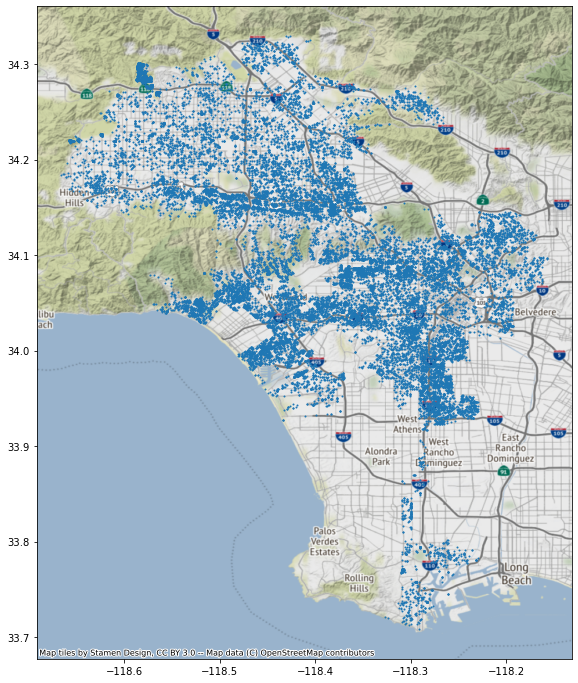

In [15]:
fig, ax = plt.subplots(figsize=(12,12))
permit_gdf.plot(markersize=1, ax=ax)
ctx.add_basemap(ax, crs=permit_gdf.crs.to_string())


In [16]:
# Heatmap adapted from: https://nbviewer.org/gist/perrygeo/c426355e40037c452434

def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet', alpha=.3, title='title'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    fig, ax = plt.subplots(figsize=(12,12))
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent, alpha=alpha, zorder=15)
    ctx.add_basemap(ax, crs=d.crs.to_string())
    ax.set_title(title, fontsize=18)
    plt.colorbar()
    plt.gca().invert_yaxis()
    
    plt.show()

/var/folders/dh/8tmq12d56mx289p14g_tpzmw0000gn/T/ipykernel_3039/1774482244.py:15: RuntimeWarning: divide by zero encountered in log
  logheatmap = np.log(heatmap)
/var/folders/dh/8tmq12d56mx289p14g_tpzmw0000gn/T/ipykernel_3039/1774482244.py:17: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')


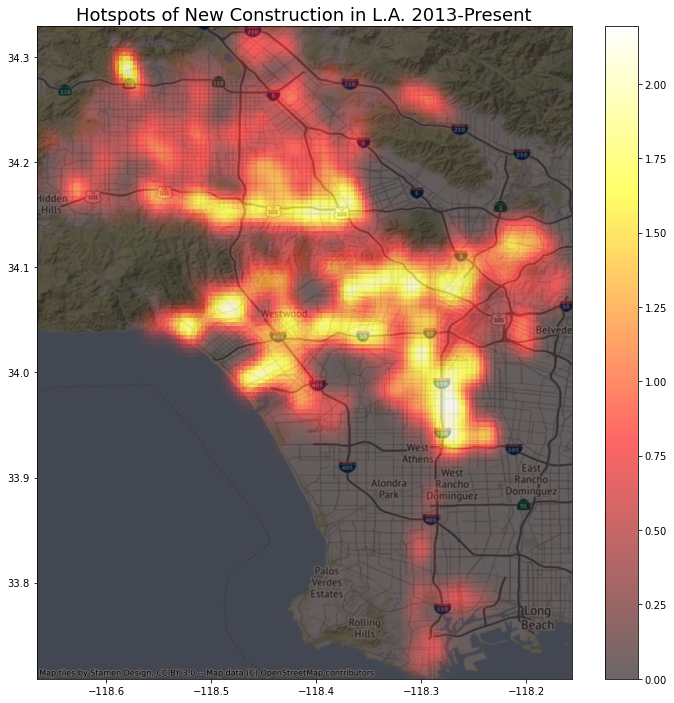

In [17]:
heatmap(permit_gdf, bins=(150,150), smoothing=2, cmap='hot', alpha=.6, title='Hotspots of New Construction in L.A. 2013-Present')

In [18]:
permit_gdf.to_file("Data/permit_gdf.geojson", driver='GeoJSON')




/Users/alliepadgett/opt/anaconda3/envs/uds/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
